# Primary Voter Turnout

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('fivethirtyeight')
# plt.style.use('bmh')

plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (18, 10)

In [50]:
df = pd.read_csv('wa_election_data/voter_turnout_by_election.csv')

In [51]:
df.head()

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout
0,2023-11-07,General Election,39,8078,4829084,1758084,0.3641
1,2023-08-01,Primary,36,6474,3865926,1116963,0.2889
2,2023-04-25,April Special Election,19,3189,1671514,530405,0.3173
3,2023-02-14,February Special Election,29,2543,1370164,451969,0.3299
4,2022-11-08,General Election,39,8021,4806852,3067686,0.6382


In [52]:
df.dtypes

Election Date                 object
Description                   object
Total Counties                object
Total Precincts               object
Eligible Registered Voters    object
Total Ballots Counted         object
Turnout                       object
dtype: object

## Data Cleaning

In [53]:
#Election Date as Datetime
df['Election Date'] = pd.to_datetime(df['Election Date'])
df['year'] = df['Election Date'].dt.year


# update dataframe - only after 2000
df = df.loc[df['Election Date'] > '2000-01-01']

In [54]:
df.dtypes

Election Date                 datetime64[ns]
Description                           object
Total Counties                        object
Total Precincts                       object
Eligible Registered Voters            object
Total Ballots Counted                 object
Turnout                               object
year                                   int32
dtype: object

In [55]:
# Where Description includes "General" 

df = df[df['Description'].str.contains("Primary")]
df

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
1,2023-08-01,Primary,36,6474,3865926,1116963,0.2889,2023
5,2022-08-02,Primary,39,8018,4803741,1941933,0.4043,2022
9,2021-08-03,Primary,37,6774,4355213,1294522,0.2972,2021
13,2020-08-04,Primary,39,7435,4612018,2510881,0.5444,2020
15,2020-03-10,Presidential Primary,39,7399,4553013,2256488,0.4956,2020
18,2019-08-06,Primary,35,6421,3967681,1173009,0.2956,2019
22,2018-08-07,Primary,39,7126,4299309,1753545,0.4079,2018
26,2017-08-01,Primary,36,6351,3781977,1017946,0.2692,2017
30,2016-08-02,Primary,39,7147,4102624,1431058,0.3488,2016
31,2016-05-24,Presidential Primary,39,7142,4088029,1421841,0.3478,2016


In [56]:
#Change column value data types

# INT
df['Total Counties'] = df['Total Counties'].replace('-',np.nan).astype('Int64')
df['Total Precincts'] = df['Total Precincts'].replace('-',np.nan).astype('Int64')
df['Eligible Registered Voters'] = df['Eligible Registered Voters'].replace('-',np.nan).astype('Int64')
df['Total Ballots Counted'] = df['Total Ballots Counted'].replace('-',np.nan).astype('Int64')

#Float
df['Turnout'] = df['Turnout'].replace('-',np.nan).astype(float)

In [57]:
df.describe()

,Election Date,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
count,26,18.0,18.0,26.0,26.0,26.000000,26.000000
mean,2012-08-09 23:04:36.923076864,37.277778,6501.388889,3403933.653846,1220510.269231,0.342658,2012.000000
min,2000-09-19 00:00:00,32.0,3505.0,323927.0,62657.0,0.180100,2000.000000
25%,2006-12-12 00:00:00,36.0,6368.5,3191978.0,843695.75,0.290525,2006.250000
50%,2013-02-05 00:00:00,39.0,6776.0,3504717.0,1233351.0,0.330850,2012.500000
75%,2018-05-06 06:00:00,39.0,7138.0,4057942.0,1450799.0,0.407000,2017.750000
max,2023-08-01 00:00:00,39.0,8018.0,4803741.0,2510881.0,0.544400,2023.000000
std,NaN,2.217724,1085.339586,1021846.25887,543857.091937,0.087214,7.031358


In [58]:
df.describe(include = 'object')

,Description
count,26
unique,10
top,Primary
freq,16


In [59]:
on_years = []
off_years = []
for x in df['year']:
    if x % 4 == 0: 
        on_years.append(x)
    else: 
        off_years.append(x)
        
on_years.sort()
off_years.sort()

print(on_years)
print(off_years)

[2000, 2004, 2008, 2012, 2016, 2016, 2020, 2020]
[2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2017, 2018, 2019, 2021, 2022, 2023]


In [60]:
df['Election Date'].dt.month #.astype(object).month

1     8
5     8
9     8
13    8
15    3
18    8
22    8
26    8
30    8
31    5
35    8
39    8
43    8
47    8
51    8
56    8
61    8
67    8
73    8
75    9
77    9
79    9
81    9
83    9
85    9
87    9
Name: Election Date, dtype: int32

In [61]:
presidential_primary_df = df.loc[df['year'].isin(on_years)]

presidential_primary_df

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
13,2020-08-04,Primary,39,7435,4612018,2510881,0.5444,2020
15,2020-03-10,Presidential Primary,39,7399,4553013,2256488,0.4956,2020
30,2016-08-02,Primary,39,7147,4102624,1431058,0.3488,2016
31,2016-05-24,Presidential Primary,39,7142,4088029,1421841,0.3478,2016
47,2012-08-07,Primary,39,6978,3731657,1435928,0.3848,2012
67,2008-08-19,Primary,39,6674,3417355,1455756,0.4260,2008
79,2004-09-14,2004 Primary,<NA>,<NA>,3279205,1480247,0.4514,2004
87,2000-09-19,2000 Primary,<NA>,<NA>,3234700,1319775,0.4080,2000


In [62]:
off_years_primary_df = df.loc[df['year'].isin(off_years)]
off_years_primary_df

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
1,2023-08-01,Primary,36,6474,3865926,1116963,0.2889,2023
5,2022-08-02,Primary,39,8018,4803741,1941933,0.4043,2022
9,2021-08-03,Primary,37,6774,4355213,1294522,0.2972,2021
18,2019-08-06,Primary,35,6421,3967681,1173009,0.2956,2019
22,2018-08-07,Primary,39,7126,4299309,1753545,0.4079,2018
26,2017-08-01,Primary,36,6351,3781977,1017946,0.2692,2017
35,2015-08-04,Primary,34,5917,3356735,817876,0.2437,2015
39,2014-08-05,Primary,39,6978,3925663,1222710,0.3115,2014
43,2013-08-06,Primary,36,3505,3221285,837098,0.2599,2013
51,2011-08-16,Primary,35,5123,2776149,819991,0.2954,2011


**First Look at Eligible Voters vs Total Ballots Counted by Year**

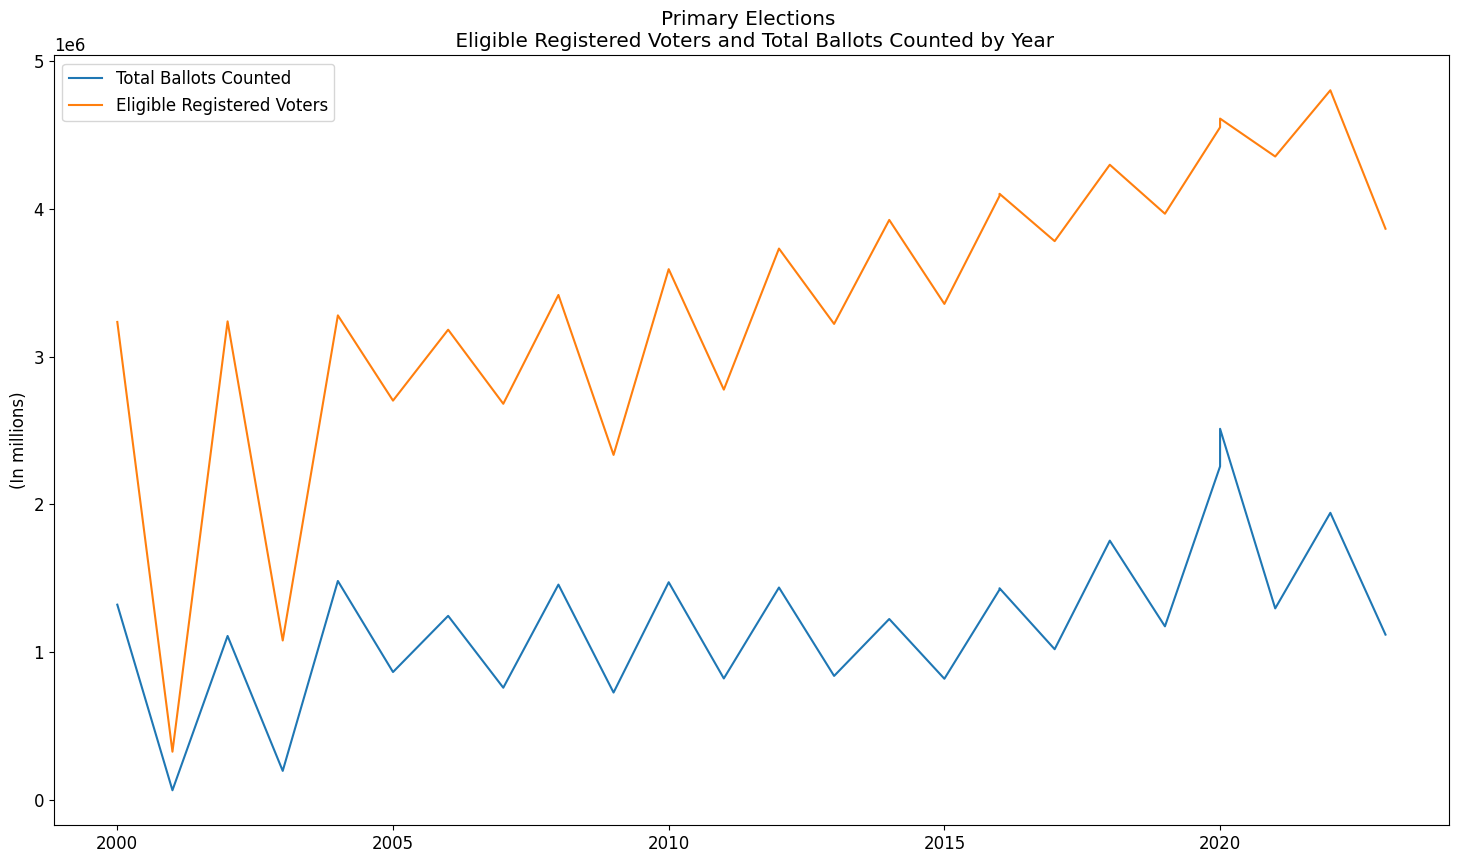

In [63]:
plt.plot(df['year'], df['Total Ballots Counted'], label = 'Total Ballots Counted')
plt.plot(df['year'], df['Eligible Registered Voters'], label = 'Eligible Registered Voters')


plt.title('Primary Elections \n Eligible Registered Voters and Total Ballots Counted by Year')
#TODO: Fix yaix as shown in millions

plt.ylabel('(In millions)')
plt.legend()
plt.show()

**First look at Turnout Percentages in elections**

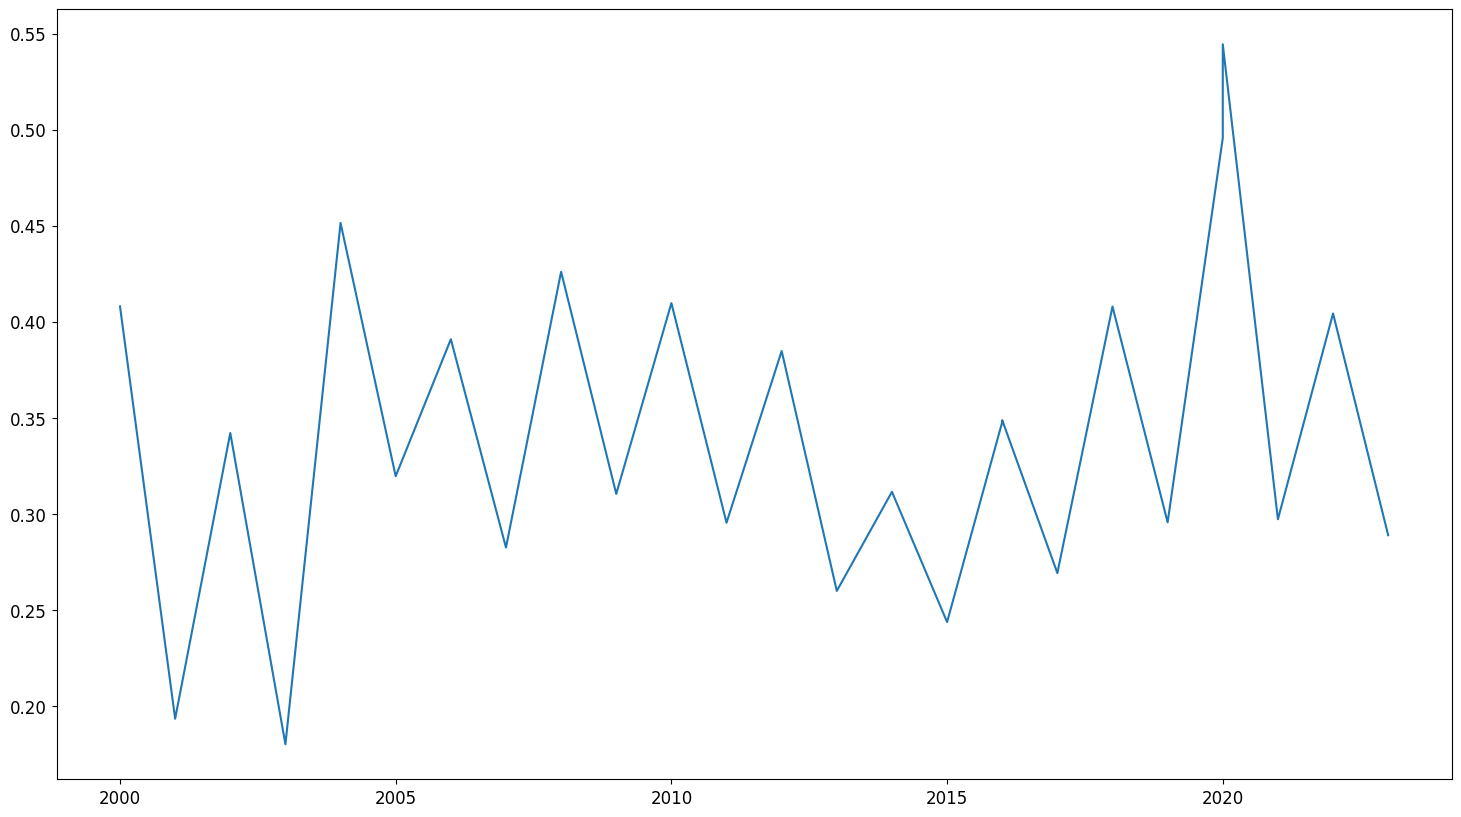

In [64]:
plt.plot(df['year'], df['Turnout'], label = 'Turnout')


**Separate Total Ballots by On and Off Year General Elections** to account for high turnout that occurs during Presidential Elections. 

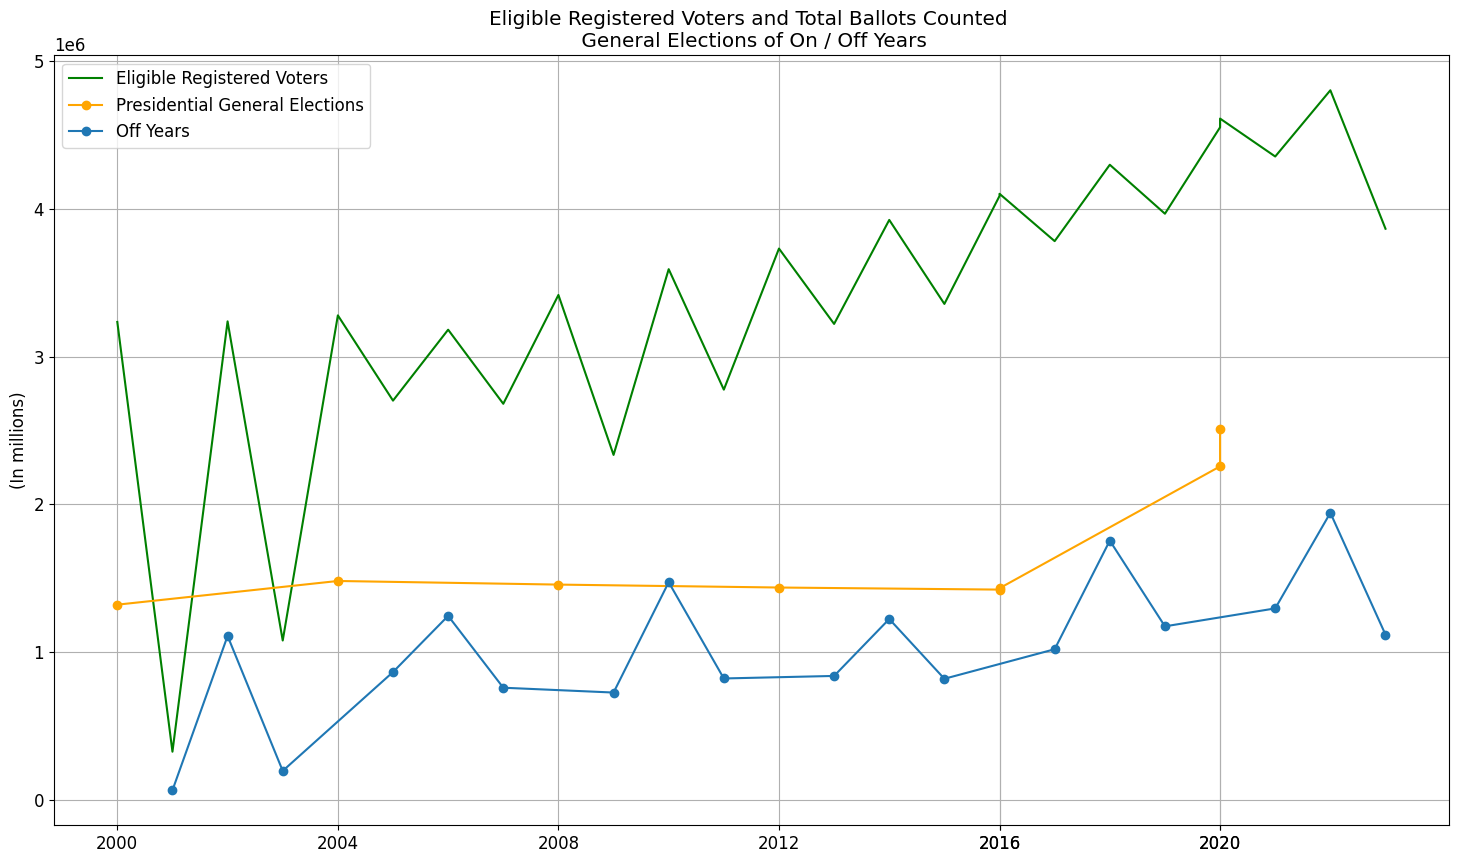

In [65]:
# Graphing on and off years

# Eligible Voters Graph
plt.plot(df['year'], df['Eligible Registered Voters'], 
         color = 'green',
         label = 'Eligible Registered Voters')

#On Years
plt.plot(presidential_primary_df['year'], presidential_primary_df['Total Ballots Counted'], 
         color = 'orange',
         label='Presidential General Elections', 
         marker = 'o')

#Off Years
plt.plot(off_years_primary_df['year'], off_years_primary_df['Total Ballots Counted'], 
         color = '#1f77b4',
         label='Off Years', 
         marker = 'o')

plt.title('Eligible Registered Voters and Total Ballots Counted \n General Elections of On / Off Years')
plt.ylabel('(In millions)')


plt.xticks(on_years)
plt.grid()

plt.legend()
plt.show()

**Looking at Voter Turnout during these On and Off Years**

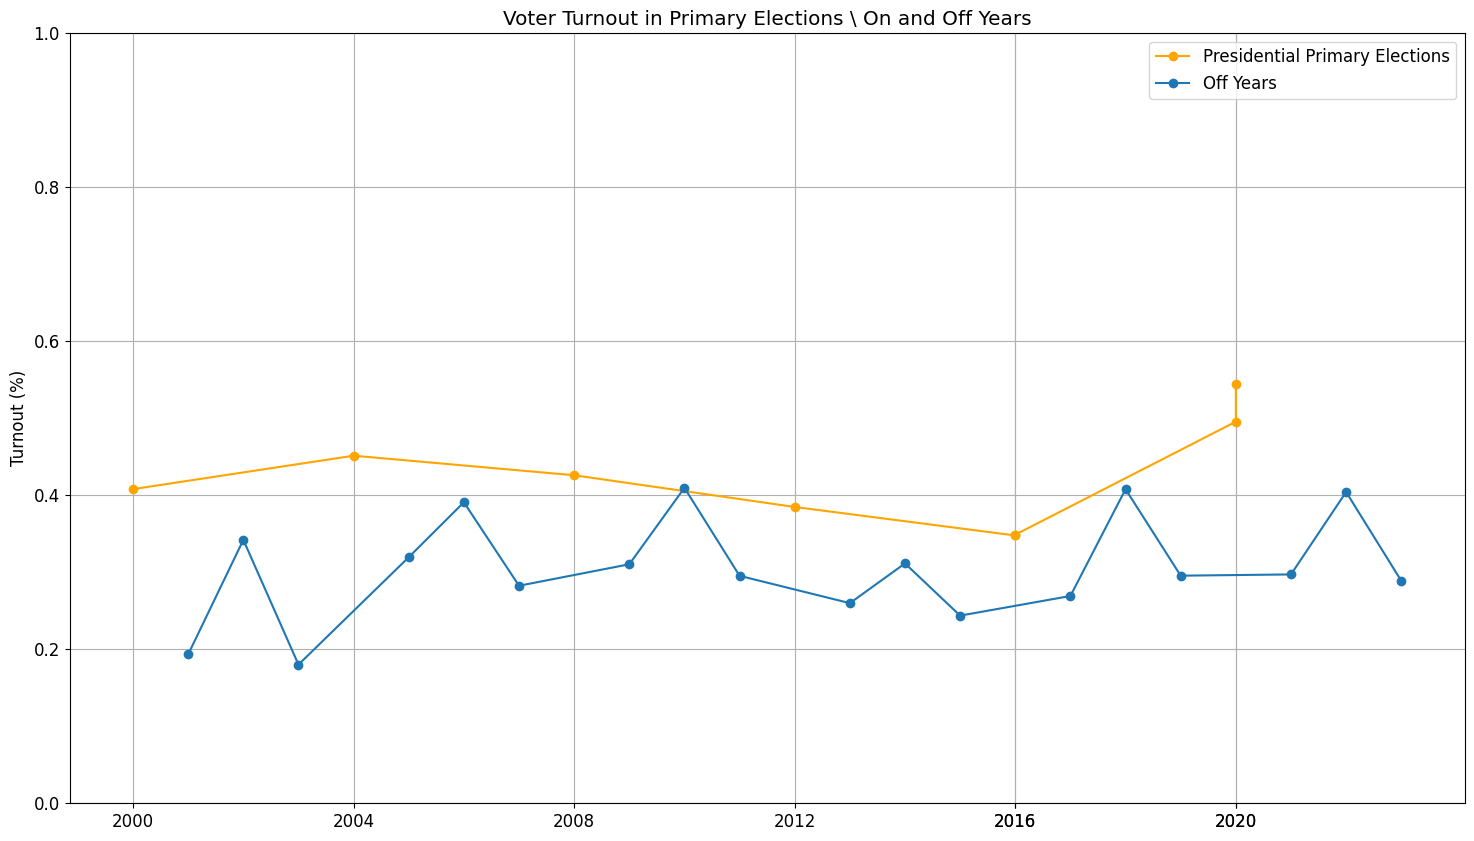

In [66]:

#On Years
plt.plot(presidential_primary_df['year'], presidential_primary_df['Turnout'], 
         label='Presidential Primary Elections',color = 'orange', marker = 'o')

#Off Years
plt.plot(off_years_primary_df['year'], off_years_primary_df['Turnout'], label='Off Years',color='#1f77b4', marker = 'o')


plt.title('Voter Turnout in Primary Elections \ On and Off Years')
plt.ylabel('Turnout (%)')

plt.ylim([0,1])
plt.xticks(on_years)

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    
plt.grid()
plt.legend()
plt.show()

#TODO: show yaxis as percentages